# Quantum Algorithms
Quantum algorithms are crucial for expanding the limits of computation in ways classical systems cannot match, offering faster solutions to specific hard problems, enabling advancements in secure communication, optimizing large-scale systems, and simulating complex quantum phenomena.

In [40]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.circuit.library import QFT
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
import numpy as np

## Grover's Algorithm
Grover’s algorithm is ideal for searching an unstructured database. While a classical computer would require 𝑂(𝑁) operations to find the item, Grover's Algorithm can do it in O(√N) operations offering a quadratic speedup.

Counts: {'01': 254, '10': 234, '00': 272, '11': 264}


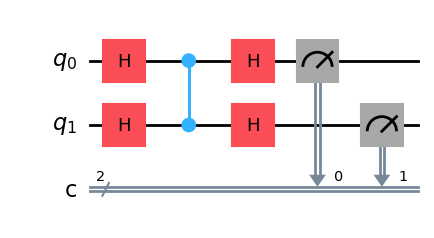

In [42]:
# Function to create the oracle for Grover's Algorithm
def grover_oracle(qc):
    qc.cz(0, 1)

qc = QuantumCircuit(2, 2) # Create a Quantum Circuit with 2 qubits and 2 classical bits
qc.h([0, 1]) # Apply Hadamard gates to put qubits into superposition
grover_oracle(qc) # Apply the Grover oracle
qc.h([0, 1]) # Apply Hadamard gates again
qc.measure([0, 1], [0, 1]) # Measure the qubits

# Use the Qiskit Aer simulator to run the circuit
simulator = AerSimulator()
compiled_circuit = transpile(qc, simulator)
result = simulator.run(compiled_circuit).result()
counts = result.get_counts() # Get the counts of outcomes
print("Counts:", counts)

qc.draw('mpl')

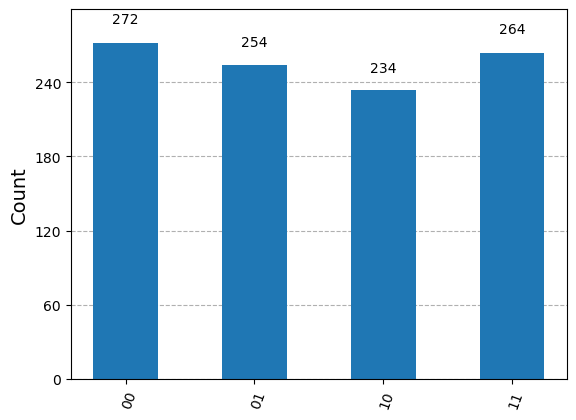

In [43]:
# Visualize the results
plot_histogram(counts)

## Shor's Algorithm
Developed by Peter Shor in 1994, Shor’s algorithm is a quantum algorithm for integer factorization that offers an exponential speedup over classical methods. It uses quantum period-finding to efficiently find factors of large numbers, which is infeasible for classical computers.

Counts: {'0000': 1024}


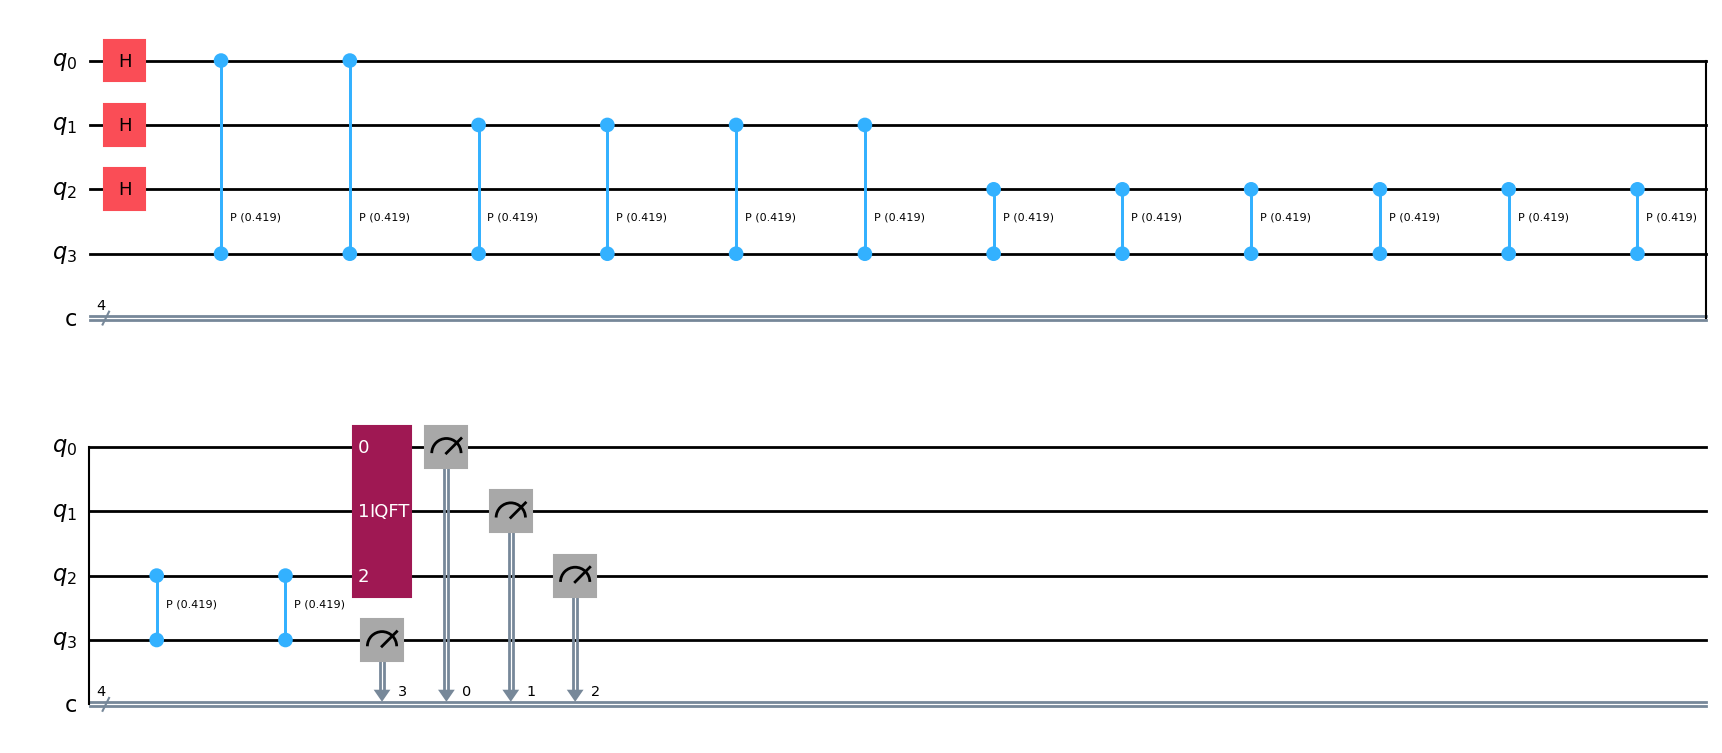

In [45]:
# Function to create controlled modular exponentiation (simplified)
def controlled_mod_exp(qs, base, exponent, modulus, control, target):
    for _ in range(exponent):
        qs.cp(2 * 3.1415 / modulus, control, target)

# Parameters for the algorithm (simplified example)
N = 15  # Number to factorize (example: 15 = 3 * 5)
base = 7  # A base integer for the modular exponentiation

# Create a Quantum Circuit
qs = QuantumCircuit(4, 4)

# Apply Hadamard gates to the first three qubits to create superposition
qs.h([0, 1, 2])

# Perform controlled modular exponentiation
controlled_mod_exp(qs, base, 2, N, 0, 3)
controlled_mod_exp(qs, base, 4, N, 1, 3)
controlled_mod_exp(qs, base, 8, N, 2, 3)

# Apply the inverse Quantum Fourier Transform
qs.append(QFT(3, do_swaps=False).inverse(), [0, 1, 2])

# Measure the qubits
qs.measure([0, 1, 2, 3], [0, 1, 2, 3])

# Use the Qiskit Aer simulator to run the circuit
simulator = AerSimulator()
compiled_circuit = transpile(qs, simulator)
result = simulator.run(compiled_circuit).result()

# Get the counts of outcomes
counts2 = result.get_counts()
print("Counts:", counts2)

qs.draw('mpl')

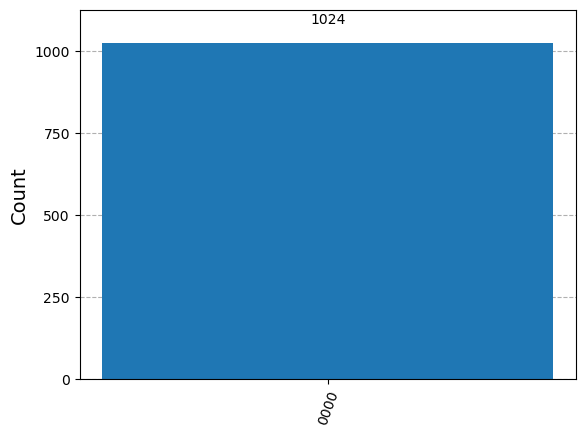

In [46]:
# Visualize the results
plot_histogram(counts2)

## Quantum Phase Estimation (QPE)
Quantum Phase Estimation (QPE) is a quantum algorithm that estimates the phase '𝜃' of an eigenvalue of a unitary operator, using a quantum register and controlled operations. It leverages quantum parallelism and the Quantum Fourier Transform (QFT) to efficiently extract phase information with high precision.

Counts: {'010': 1024}


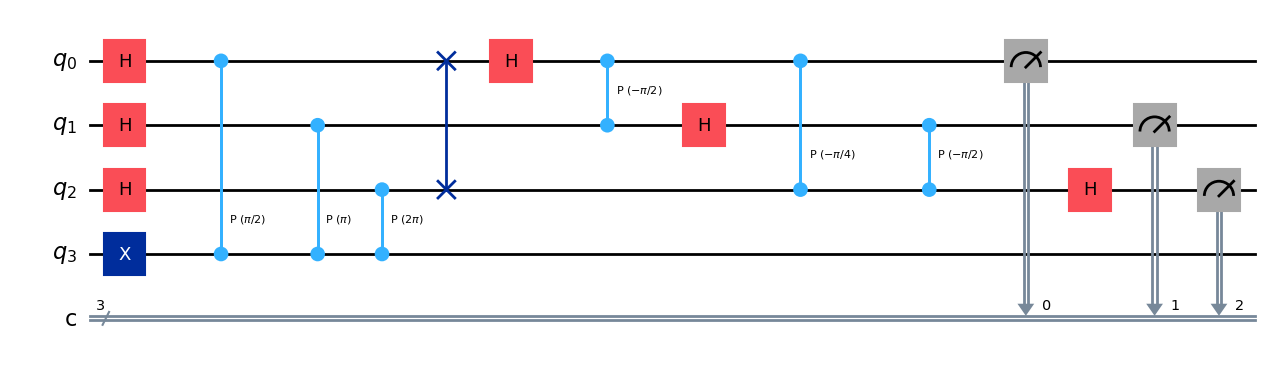

In [48]:
# Define parameters
theta = 0.25  # Phase we want to estimate
n_qubits = 3  # Number of qubits in the phase estimation register

# Create the quantum circuit
qp = QuantumCircuit(n_qubits + 1, n_qubits)  # Last qubit is for the eigenstate

# Step 1: Initialize the eigenstate in |1>
qp.x(n_qubits)

# Step 2: Apply Hadamard gates to phase estimation qubits
qp.h(range(n_qubits))

# Step 3: Apply controlled unitary operations
for qubit in range(n_qubits):
    qp.cp(2 * np.pi * theta * (2 ** qubit), qubit, n_qubits)

# Step 4: Apply the Quantum Fourier Transform (inverse)
for qubit in range(n_qubits // 2):
    qp.swap(qubit, n_qubits - qubit - 1)
for j in range(n_qubits):
    for k in range(j):
        qp.cp(-np.pi / (2 ** (j - k)), k, j)
    qp.h(j)

# Step 5: Measure the phase estimation qubits
qp.measure(range(n_qubits), range(n_qubits))

# Run the circuit on a simulator and get the results
simulator = AerSimulator()
compiled_circuit = transpile(qp, simulator)
result = simulator.run(compiled_circuit).result()
counts3 = result.get_counts(qp)
print("Counts:", counts3)

qp.draw('mpl')

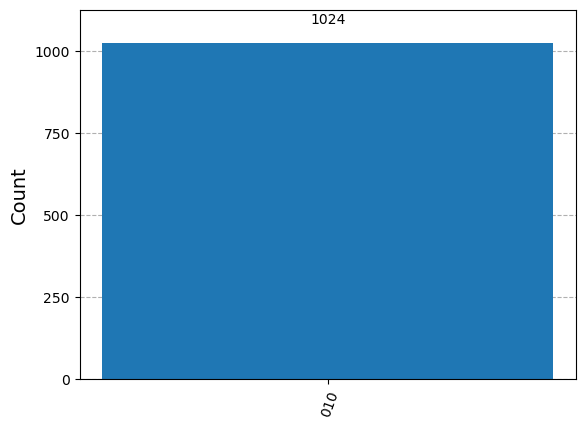

In [49]:
# Plot the results
plot_histogram(counts3)

# Quantum Fourier Transform (QFT)
Quantum Fourier Transform (QFT) is a quantum algorithm that transforms a quantum state into its Fourier basis, efficiently extracting frequency components. It uses quantum parallelism to perform this transformation exponentially faster than classical Fourier transforms.

In [51]:
# Function to apply QFT
def apply_qft(circuit, n):
    for j in range(n):
        for k in range(j):
            circuit.cp(np.pi/2**(j-k), k, j)
        circuit.h(j)

# Function to apply inverse QFT
def apply_inverse_qft(circuit, n):
    for j in range(n//2):
        circuit.swap(j, n-1-j)
    for j in reversed(range(n)):
        circuit.h(j)
        for k in reversed(range(j)):
            circuit.cp(-np.pi/2**(j-k), k, j)
            
# Create a quantum circuit
num_qubits = 3
qf = QuantumCircuit(num_qubits)

# Apply Hadamard gates to nitialize the qubits to a superposition state
qf.h(range(num_qubits))


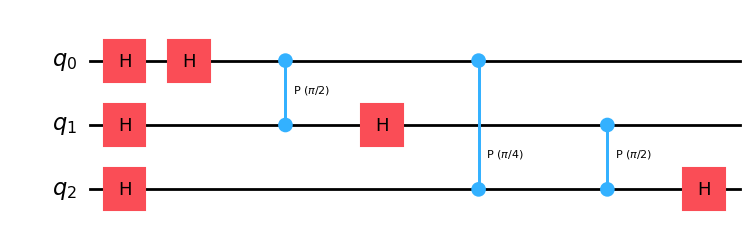

In [52]:
# Apply QFT
apply_qft(qf, num_qubits)

# Draw the circuit after QFT
qf.draw('mpl')

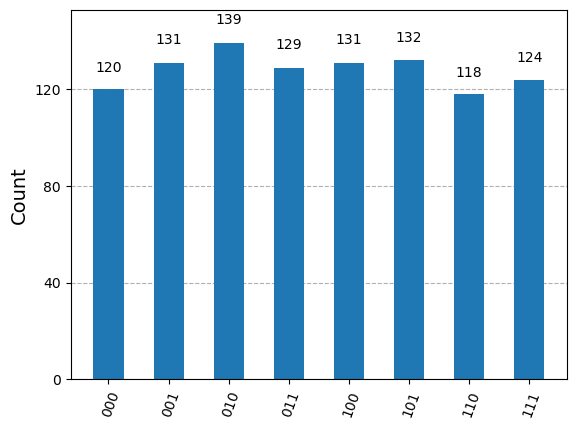

In [53]:

# Apply inverse QFT to verify correctness
apply_inverse_qft(qf, num_qubits)

# Measure the qubits
qf.measure_all()

# Draw the final circuit
qf.draw('mpl')

# Initialize the simulatorz
simulator = AerSimulator()

# Transpile and execute the circuit on the simulator
compiled_circuit = transpile(qf, simulator)

# Draw the transpiled circuit
compiled_circuit.draw('mpl')

result = simulator.run(compiled_circuit).result()

# Get and plot the results
counts = result.get_counts(qf)
plot_histogram(counts)
